# **Uploading the data and getting libraries ready**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The inter-arrival times are converted to seconds

In [ ]:
data = pd.read_excel('Dataset.xlsx', header=1)
data.head(5)

,Customer no,Day 1,Day 2,Day 1 Arrival,Day 1 IA,Day 2 Arrival,Day 2 IA
0,1,2018-03-31 10:04:05.414,2018-03-31 10:00:05.565,36245,245,36006,6
1,2,2018-03-31 10:06:03.799,2018-03-31 10:01:26.033,36364,119,36086,80
2,3,2018-03-31 10:07:18.957,2018-03-31 10:02:27.062,36439,75,36147,61
3,4,2018-03-31 10:09:52.152,2018-03-31 10:02:58.577,36592,153,36179,32
4,5,2018-03-31 10:14:59.182,2018-03-31 10:04:27.867,36899,307,36268,89


# **Day 1**

Inter-arrivals for day 1

In [ ]:
IA1 = data.iloc[:, 4]
IA1.head(5)

,Day 1 IA
0,245
1,119
2,75
3,153
4,307


### **Question 1**
Plot the inter-arrival times based on the given set of observations. Is there an obvious pattern? Visually evaluate whether the data has stationary mean, or not. Repeat for the variance

Appears to be exponentialy distributed




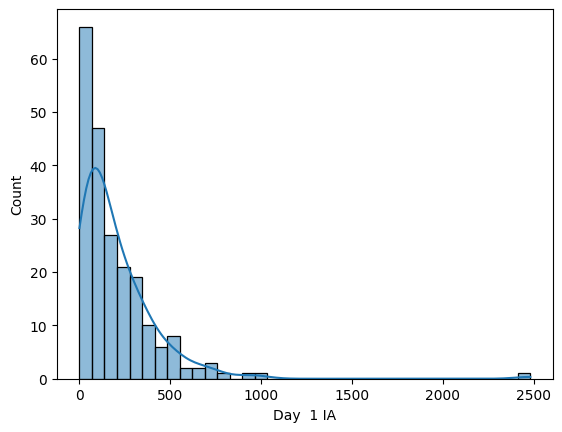

In [ ]:
sns.histplot(IA1.sort_values(ascending=True, axis=0).reset_index(drop=True), kde=True);
print("Appears to be exponentialy distributed")
print("\n")

Checking whether the mean is stationary or not

The data does not have a stationary mean




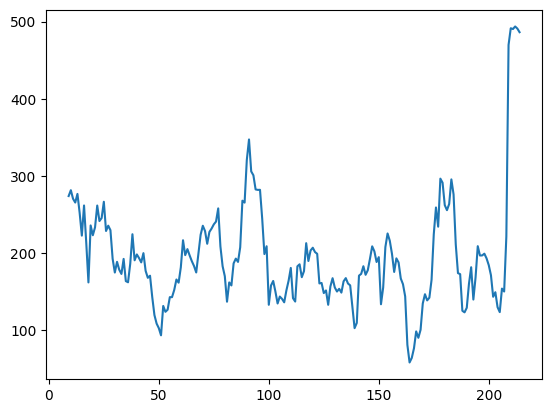

In [ ]:
IA1.rolling(window=10).mean().plot();
print("The data does not have a stationary mean")
print("\n")

Checking whether the variance is stationary or not

The data does not have a stationary variance




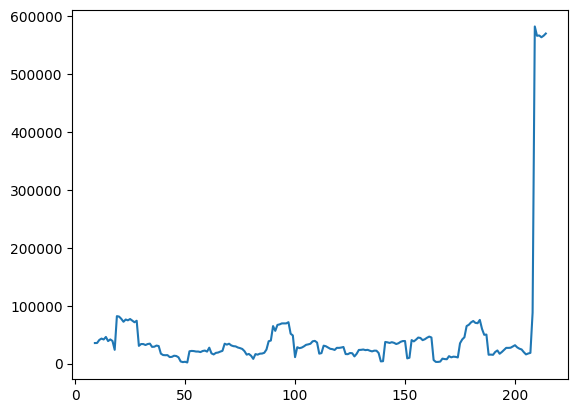

In [ ]:
IA1.rolling(window=10).var().plot()
print("The data does not have a stationary variance")
print("\n")

### **Question 2**
One of the managers claims that it is safe to assume that inter-arrival times are distributed uniformly between 0 and 300 seconds. Test the validity of this claim using the Kolmogorov-Smirnov test with a significance level of 0.05.

$
H_0:  R_i \sim U(0 , 300)
$

$
H_1: Ri \nsim U(0 , 300)
$

$
α = 0.05
$

In [ ]:
def kolmogorov_smirnov_test(data, alpha=0.05):
    n = len(data)
    data_sorted = np.sort(data)
    Ri = data_sorted / 300
    # i = 1, 2, 3, ..., 215
    i = np.arange(1, n+1)
    D_plus = np.max((i / n) - Ri)
    D_minus = np.max((Ri - (i-1)/ n))
    D0 = max(D_plus, D_minus)
    return D0

$
D_{215, 0.05} = 1.36  / \sqrt{215}
$

In [ ]:
D = 1.36 / np.sqrt(215)
D0 = kolmogorov_smirnov_test(IA1)

In [ ]:
D, D0

(0.09275123016798441, 7.277984496124031)

$
D_{215, 0.05} < D_0 \text{ , therefore we reject the null hypothesis at a significance level of 0.05}
$

### **Question 3**
Find sample mean, standard deviation and other descriptive statistics that you deem appropriate.

In [ ]:
table = IA1.describe()
table.loc['skewness'] = IA1.skew()
table.loc['kurtosis'] = IA1.kurtosis()
table.loc['range'] = IA1.max() - IA1.min()
table.loc['median'] = IA1.median()
table.loc['mode'] = IA1.mode()[0]
table.loc['sum'] = IA1.sum()
table

,Day 1 IA
count,215.000
mean,200.233
std,238.905
min,0.000
25%,60.500
50%,129.000
75%,270.500
max,2482.000
skewness,4.727
kurtosis,38.788


### **Question 4**
Draw frequency histograms of the data for 5, 10 and 20 seconds. Comment on the shape of the histograms.

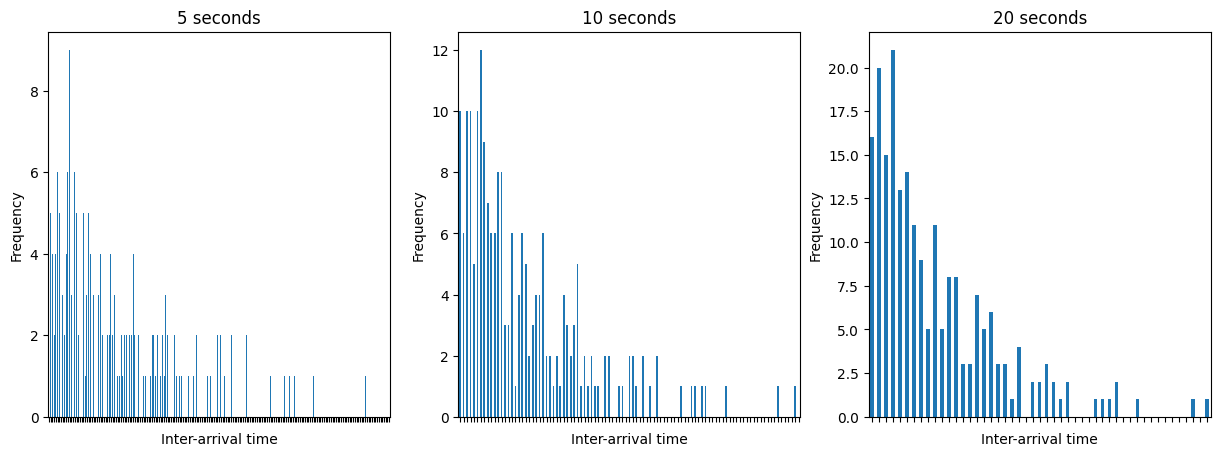

In [ ]:
seconds = [5, 10, 20]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    sorted = IA1.sort_values(ascending=True, axis=0).reset_index(drop=True)
    intervals = pd.cut(sorted, bins=np.arange(0, 1000, seconds[i])).dropna()
    intervals.value_counts().sort_index().plot(kind='bar', ax=ax[i])
    ax[i]. set_xticklabels([])
    ax[i].set_title(f'{seconds[i]} seconds')
    ax[i].set_xlabel('Inter-arrival time')
    ax[i].set_ylabel('Frequency')

If the width of the intervals is too small, the histogram becomes ragged. Also it should not be too large either, because then the histogram becomes coarse.

### **Question 5**
Perform a chi-square test at a significance level of 0.05 with 10 intervals to test whether the data comes from an exponential distribution where the mean is as found in step 3.

$
H_0:  R_i \sim Exp(λ)
$

$
H_1: Ri \nsim Exp(λ)
$

$
α = 0.05
$

$
k=10
$

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

def chi_square_test(data, alpha=0.05, num_intervals=10):
    n = len(data)
    k = 10
    mean = data.describe().loc['mean']
    _lambda_ = 1 / mean
    # i = 0, 1, 2 .., k
    i = np.arange(0, k+1)
    ai = (-1/_lambda_) * np.log(1 - i/k)
    class_interval = [(ai[i], ai[i+1]) for i in range(len(ai)-1)]
    Ei = len(data) / k
    Oi = np.zeros(k)

    for j in range(k):
        for i in range(n):
            if data[i] >= class_interval[j][0] and data[i] < class_interval[j][1]:
                Oi[j] += 1

    Difference = (Oi - Ei)**2 / Ei

    print("Chi-Square Statistic:", np.sum(Difference))
    print("\n")
    return pd.DataFrame({'Class Interval': class_interval, 'Expected Frequency': Ei, 'Observed Frequency': Oi, '(Oi-Ei)^2/Ei': Difference})

In [ ]:
chi_square_test(IA1)

Chi-Square Statistic: 1.7906976744186047




,Class Interval,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,"(-0.0, 21.096605577067077)",21.5,21.0,0.012
1,"(21.096605577067077, 44.680604111984785)",21.5,21.0,0.012
2,"(44.680604111984785, 71.4179364491276)",21.5,26.0,0.942
3,"(71.4179364491276, 102.28392140988791)",21.5,22.0,0.012
4,"(102.28392140988791, 138.79063313072393)",21.5,23.0,0.105
5,"(138.79063313072393, 183.47123724270872)",21.5,18.0,0.570
6,"(183.47123724270872, 241.0745545406118)",21.5,21.0,0.012
7,"(241.0745545406118, 322.2618703734327)",21.5,21.0,0.012
8,"(322.2618703734327, 461.0525035041566)",21.5,22.0,0.012
9,"(461.0525035041566, inf)",21.5,20.0,0.105


$
df = k - s - 1 = 10 - 1 - 1 = 8
$

$
\chi^2_{0} = 1.790697674
$


$
\chi^2_{0.05, 8} = 15.507
$

$
\text{Since } \chi^2_{0} < \chi^2_{0.05, 8} \text{ we fail to reject the null hypothesis}
$

### **Question 6**

Draw the QQ-plot to test whether the data comes from an exponential distribution.

In [ ]:
def qq_plot(data):
  n = len(data)
  mean = data.describe().loc['mean']
  data = np.sort(data)
  _lambda_ = 1 / mean
  numbers = (np.arange(n) - 1/2) / n
  quantiles = -np.log(1 - numbers) / _lambda_

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.scatter(data, quantiles)
  x = np.arange(0, data.max())
  y = x
  plt.plot(x, y, color='red', linestyle='--')
  plt.xlim(0, 1500)
  plt.ylim(0, 1500)
  plt.xlabel('Data')
  plt.ylabel('Quantiles')
  plt.title('QQ Plot')
  plt.show()


The plot appears to be approximately a straight line




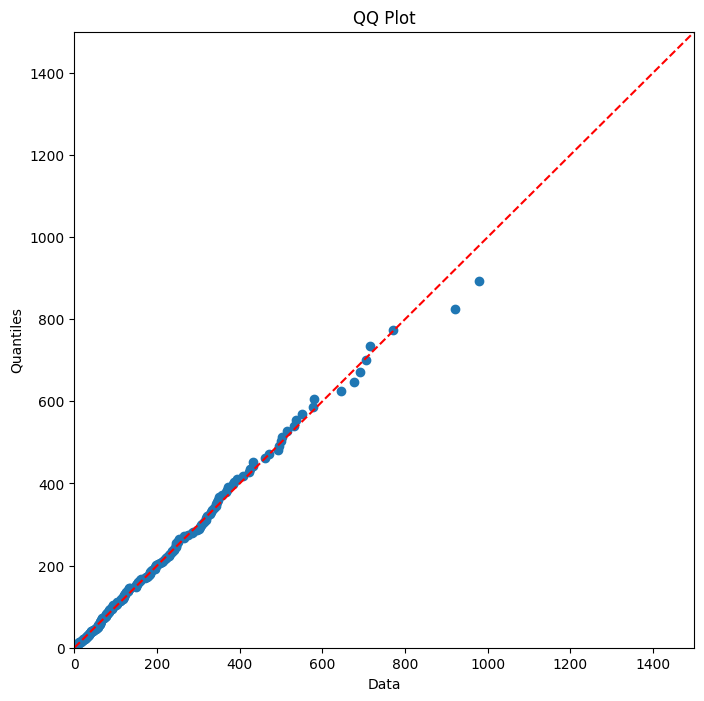

In [ ]:
print("The plot appears to be approximately a straight line")
print("\n")
qq_plot(IA1);

# **Day 2**

In [ ]:
IA2 = data.iloc[:146, 6]
IA2.head(5)

,Day 2 IA
0,6
1,80
2,61
3,32
4,89


### **Question 1**
Plot the inter-arrival times based on the given set of observations. Is there an obvious
pattern? Visually evaluate whether the data has stationary mean, or not. Repeat for the
variance

There is a trend in the data




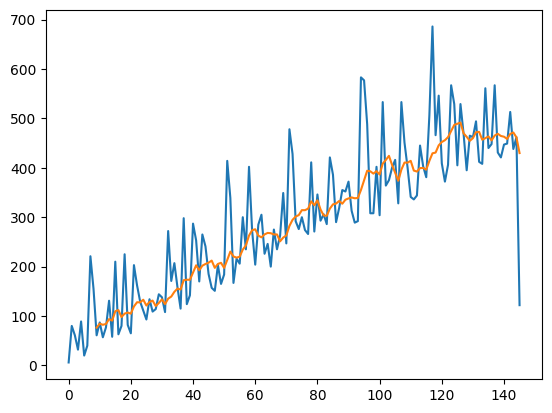

In [ ]:
IA2.plot()
IA2.rolling(window=10).mean().plot()
print("There is a trend in the data")
print("\n")

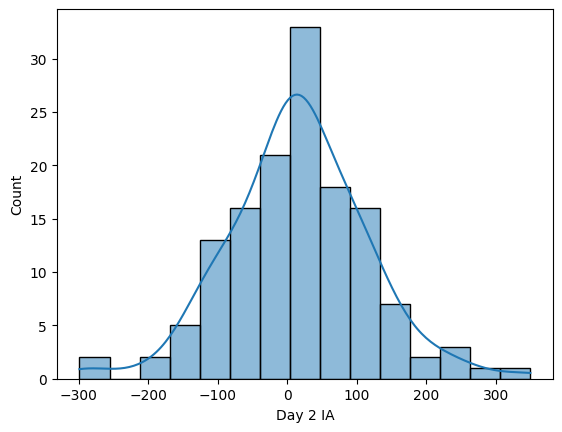

In [ ]:
sns.histplot(IA2.diff(6).sort_values(ascending=True, axis=0).reset_index(drop=True), kde=True);

<Axes: >

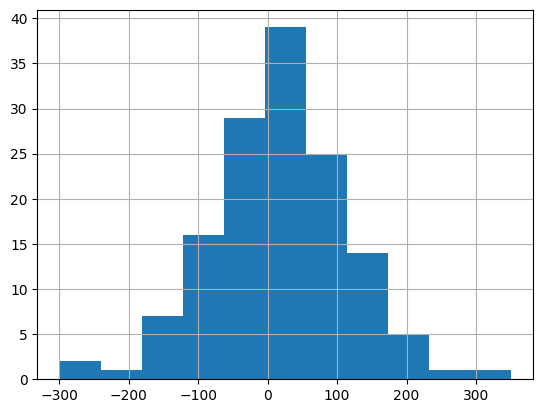

In [ ]:
IA2.diff(6).dropna().hist(bins=11)

The data does not have a stationary mean




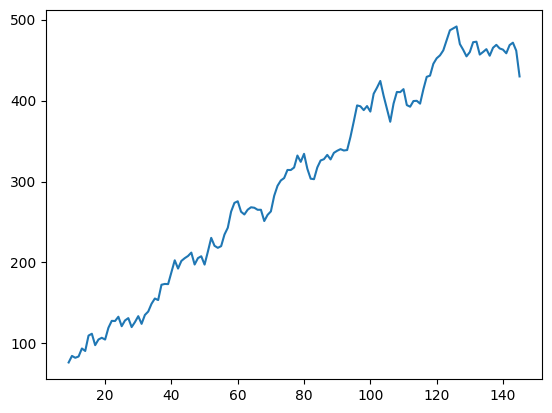

In [ ]:
IA2.rolling(window=10).mean().plot()
print("The data does not have a stationary mean")
print("\n")

The data does not have a stationary variance




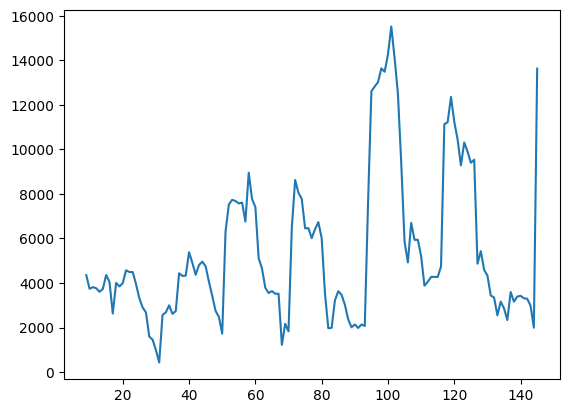

In [ ]:
IA2.rolling(window=10).var().plot()
print("The data does not have a stationary variance")
print("\n")

### **Question 2**

Explain what can be done to conduct an input analysis on this data set.  


The data is trending. De-trending can be applied. We can do lag plotting and check for auto-correlation.

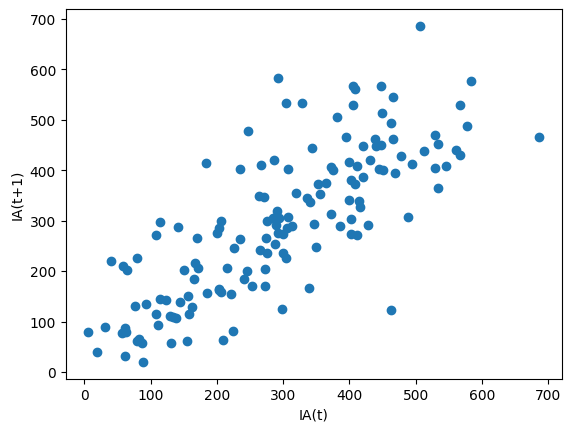

In [ ]:
pd.plotting.lag_plot(IA2, lag=1)
plt.xlabel("IA(t)")
plt.ylabel("IA(t+1)");

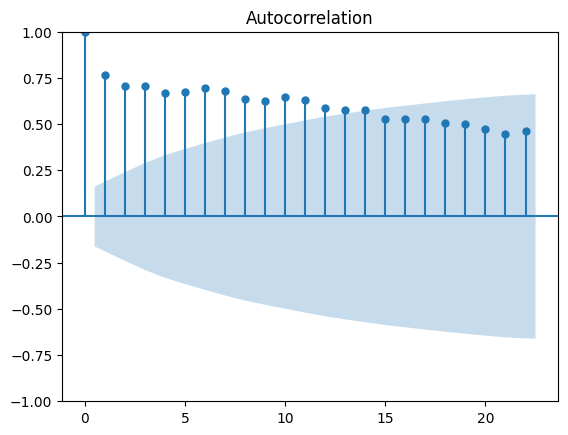

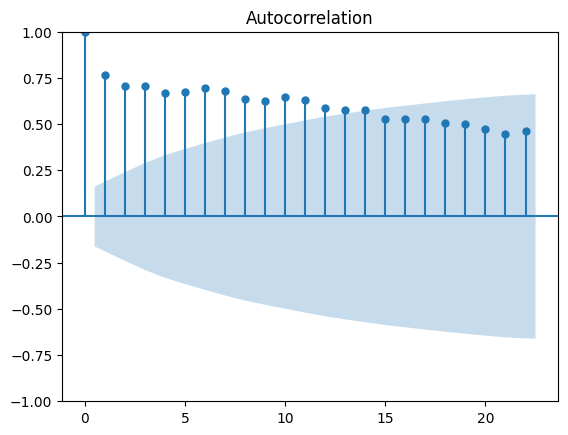

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(IA2)